# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = "train.p"
validation_file= "valid.p"
testing_file = "test.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)

X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [2]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results
import random
import numpy as np

random.seed(8675309)

# TODO: Number of training examples
n_train = len(X_train)

# TODO: Number of validation examples
n_validation = len(X_valid)

# TODO: Number of testing examples.
n_test = len(X_test)

# TODO: What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(np.unique(y_train))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

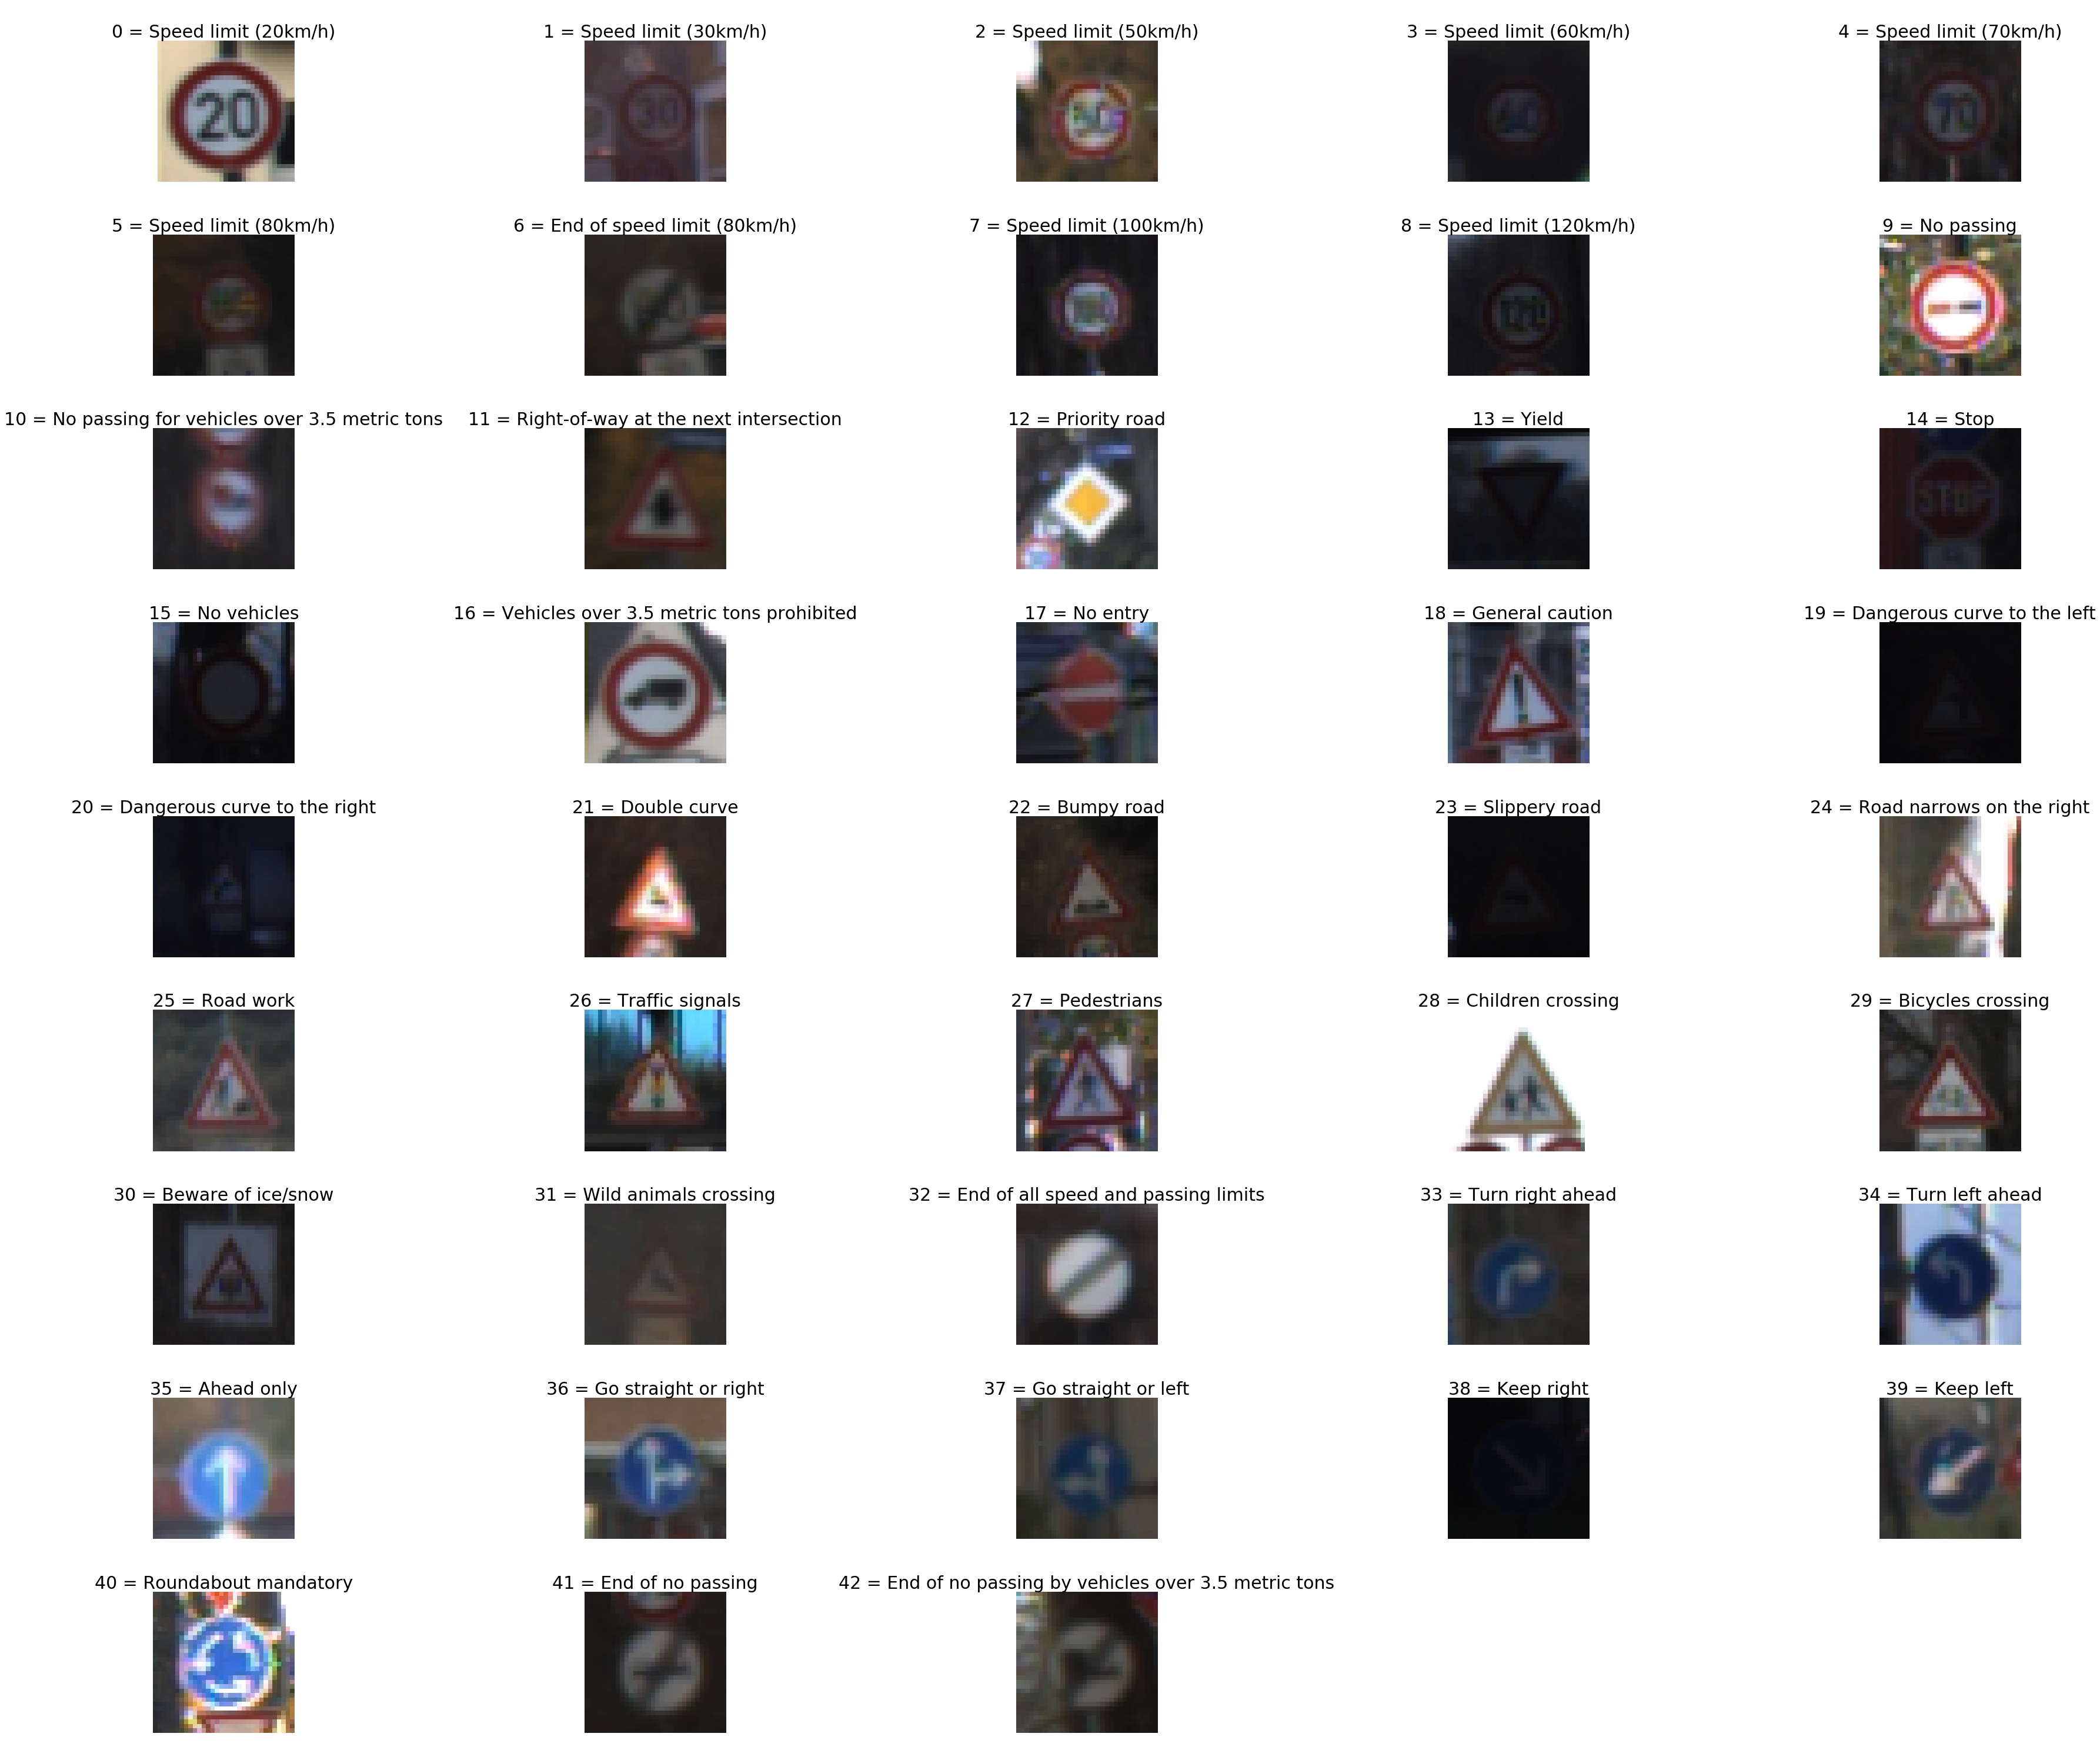

In [3]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline
import pandas as pd


sign_names = pd.read_csv("signnames.csv", header=0, index_col=0)

# Generate example of each sign class.
sign_examples = []
for i in range(n_classes):
    # find sign class in y_train and select the first image.
    index = np.argwhere(y_train==i)[0,0]
    sign_examples.append(X_train[index].squeeze())
    
# Plot an example of each sign class.
def show_sign_examples(images, sign_names, gray=False, cols=5):
    """Helper function to show images in subplots from array images and image sign names.
    
      Args:
        images (list): list of input images (array).
        sign_names (list): list of sign names (str).
        gray (boolean): gray scale image.
        cols (int): number of display columns.
    """
    nb_images = len(images)
    rows = int(nb_images/cols) + (nb_images%cols) # calulate row + modulo
    cmap="gray" if gray else None

    plt.figure(1, figsize=(50, 50))
    for i in range(n_classes):
        plt.subplot(rows, cols, i+1)
        plt.title("\n{:.0f} = {}".format(i, sign_names.loc[i][0]), fontsize=30)
        plt.imshow(images[i].squeeze(), cmap=cmap)
        plt.axis('off')
    plt.tight_layout(pad=0., w_pad=0., h_pad=1.0)
    plt.show()

show_sign_examples(sign_examples, sign_names)

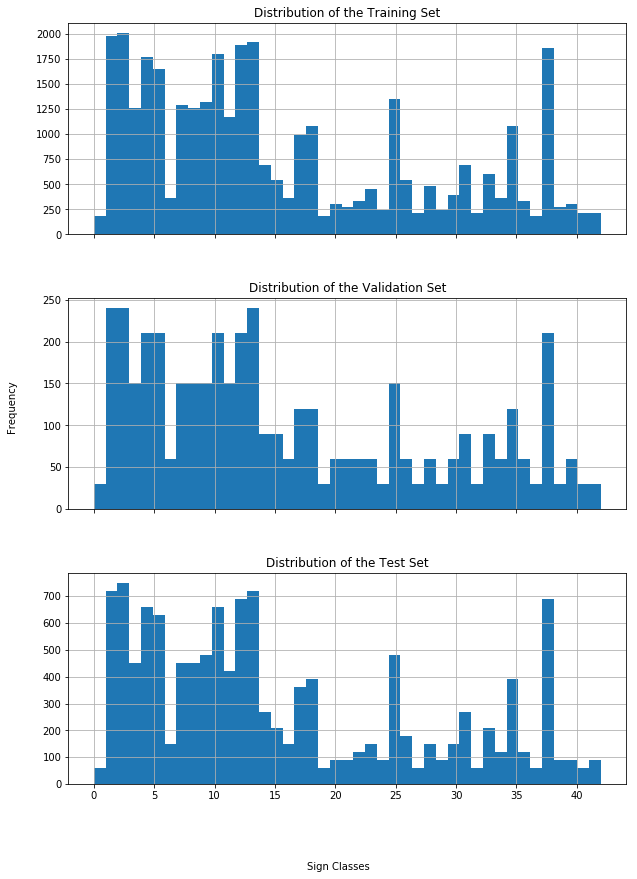

In [4]:
## Datasets Distribution Visualization 

f, axarr = plt.subplots(3, sharex=True, figsize=(10, 14))
df = pd.DataFrame(y_train)
df.hist(bins=n_classes, ax=axarr[0])
axarr[0].set_title('Distribution of the Training Set')

df = pd.DataFrame(y_valid)
df.hist(bins=n_classes, ax=axarr[1])
axarr[1].set_title('Distribution of the Validation Set')

df = pd.DataFrame(y_test)
df.hist(bins=n_classes, ax=axarr[2])
plt.title('Distribution of the Test Set')

f.text(0.5, 0.04, "Sign Classes", ha='center')
f.text(0.04, 0.5, "Frequency", va='center', rotation="vertical")
plt.xticks(range(0, n_classes, 5))
plt.show()


----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

### Helper functions to support image preprocessing

The collection of helper functions are designed to perform image processing easily and flexible to change algorithm without changing the working pipeline.

- **image_resize**: function to resize an image
- **image_normalizing**: function to normalize array to be in range between 0 to 1
- **grayscale**: function to convert image to be gray color
- **add_noise**: function to add noise to an image
- **preprocess**: image preprocessing pipeline to resize and enhance an image
- **batch_randomize**: function to randomly generate 2 batches dataset from a pair of x and y
- **augment_data**: function to create augmented image data



In [5]:
## Helper functions to support image preprocessing.

import cv2

def image_resize(img, image_size=(32,32)):
    """Helper function to return resized numpy array image.
    """
    img = cv2.resize(img, image_size)
    return img

def image_normalizing(img):
    """Helper function to normalize numpy array image to the range between 0 to 1.
       https://docs.opencv.org/2.4/modules/core/doc/operations_on_arrays.html
    """
#     norm_image = (img - 128.)/128.
    norm_image = cv2.normalize(img, img, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)
    return norm_image
    
def grayscale(img):
    """Helper function to convert numpy array image to gray scale.
    """
    return cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)


def add_noise(img, noise_level=1.0):
    """Helper function to add noise to an image.
        
        Args:
        noise_level: noise scaler the higher noise_level, the more noise will be added.
    """
    noisy_image = img + noise_level * img.std() * np.random.random(img.shape)
    return noisy_image

def preprocess(img):
    """Image preprocessing pipeline to resize and enhance numpy array image.
    """
    resized_image = image_resize(img, image_size= image_shape[:2])
    output_image = image_normalizing(resized_image)
    return output_image

def batch_randomize(x, y, batch_size=128):
    """Helper function to randomly generate 2 batches dataset from a pair of x and y.
    
        batch_randomize function take x and y as inputs,
        then create permutated indices and return shuffled 2 datasets with the specific size.
        
        Args:
        x (array): first input dataset.
        y (array): second input dataset.
        batch_size (int): the returned batch size.
    """    
    # Generate the permutation index array.
    permutation = np.random.permutation(x.shape[0])
    # Shuffle the arrays by giving the permutation in the square brackets.
    shuffled_x = x[permutation][:batch_size]
    shuffled_y = y[permutation][:batch_size]
    return shuffled_x, shuffled_y

def augment_data(dataset, dataset_labels, use_random_rotation=True, use_random_shear=True,\
                 use_random_shift=True, use_random_zoom=True, use_random_noise=True, auto_random=False, batch_size=0):
    """Helper function to create augmented image data.

       The function creates augmented image data by taking its image data and labels to process 5 augmented functions 
       random rotation, random shear, random shift, random zoom, random add noise and 
       randomly generate returned batch data of images and labels same size as a batch_size variable.

      Args:
        dataset (array): input images.
        dataset_labels (array): input image labels.
        use_random_rotation (boolean): a flag to enable random rotation function.
        use_random_shear (boolean): a flag to enable random shear function.
        use_random_shift (boolean): a flag to enable random shift function.
        use_random_zoom (boolean): a flag to enable random zoom function.
        use_random_noise (boolean): a flag to enable random noise adding function.
        auto_random (boolean): a flag to randomly enable 5 augmented functions.
        batch_size (int): the returned batch size if 0 mean disable batch_randomize function.
    """
    augmented_image = []
    augmented_image_labels = []
    
    # if auto_random is True then create 5 random boolean flag for aumented functions.
    if auto_random:
        use_random_rotation, use_random_shear, use_random_shift, use_random_zoom, use_random_noise = np.random.randint(2, size=5)
    
    for num in range (0, dataset.shape[0]):
        # store original images & labels:
        augmented_image.append(dataset[num])
        augmented_image_labels.append(dataset_labels[num])
        
        # Tensorflow image processing API https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image
        # IF use_random_rotation is True then uses Tensorflow API to perform a random rotation of a Numpy image tensor.
        if use_random_rotation:
            augmented_image.append(tf.contrib.keras.preprocessing.image.random_rotation(dataset[num], 20, row_axis=0, col_axis=1, channel_axis=2))
            augmented_image_labels.append(dataset_labels[num])
            
        # IF use_random_shear is True then uses Tensorflow API to perform a random spatial shear of a Numpy image tensor.
        if use_random_shear:
            augmented_image.append(tf.contrib.keras.preprocessing.image.random_shear(dataset[num], 0.2, row_axis=0, col_axis=1, channel_axis=2))
            augmented_image_labels.append(dataset_labels[num])
            
        # IF use_random_shift is True then uses Tensorflow API to perform a random spatial shift of a Numpy image tensor.
        if use_random_shift:
            augmented_image.append(tf.contrib.keras.preprocessing.image.random_shift(dataset[num], 0.2, 0.2, row_axis=0, col_axis=1, channel_axis=2))
            augmented_image_labels.append(dataset_labels[num])
            
        # IF use_random_zoom is True then uses Tensorflow API to perform a random spatial zoom of a Numpy image tensor.
        if use_random_zoom:
            augmented_image.append(tf.contrib.keras.preprocessing.image.random_zoom(dataset[num], (0.9, 0.9), row_axis=0, col_axis=1, channel_axis=2))
            augmented_image_labels.append(dataset_labels[num])
            
        # IF use_random_noise is True then uses add_noise function to perform a random adding noise to Numpy image tensor.
        if use_random_noise:
            augmented_image.append(add_noise(dataset[num], np.random.uniform(low=1.0, high=1.2, size=(1,))[0]))
            augmented_image_labels.append(dataset_labels[num])
                
    # convert list of augmented_image and augmented_image_labels to arrays.
    augmented_image = np.asarray(augmented_image)
    augmented_image_labels= np.asarray(augmented_image_labels)
    
    # If batch_size is not equal to 0 then perform batch_randomize with batch_size.
    if batch_size != 0:
        augmented_image, augmented_image_labels = batch_randomize(augmented_image, augmented_image_labels, batch_size=batch_size)
    return augmented_image, augmented_image_labels

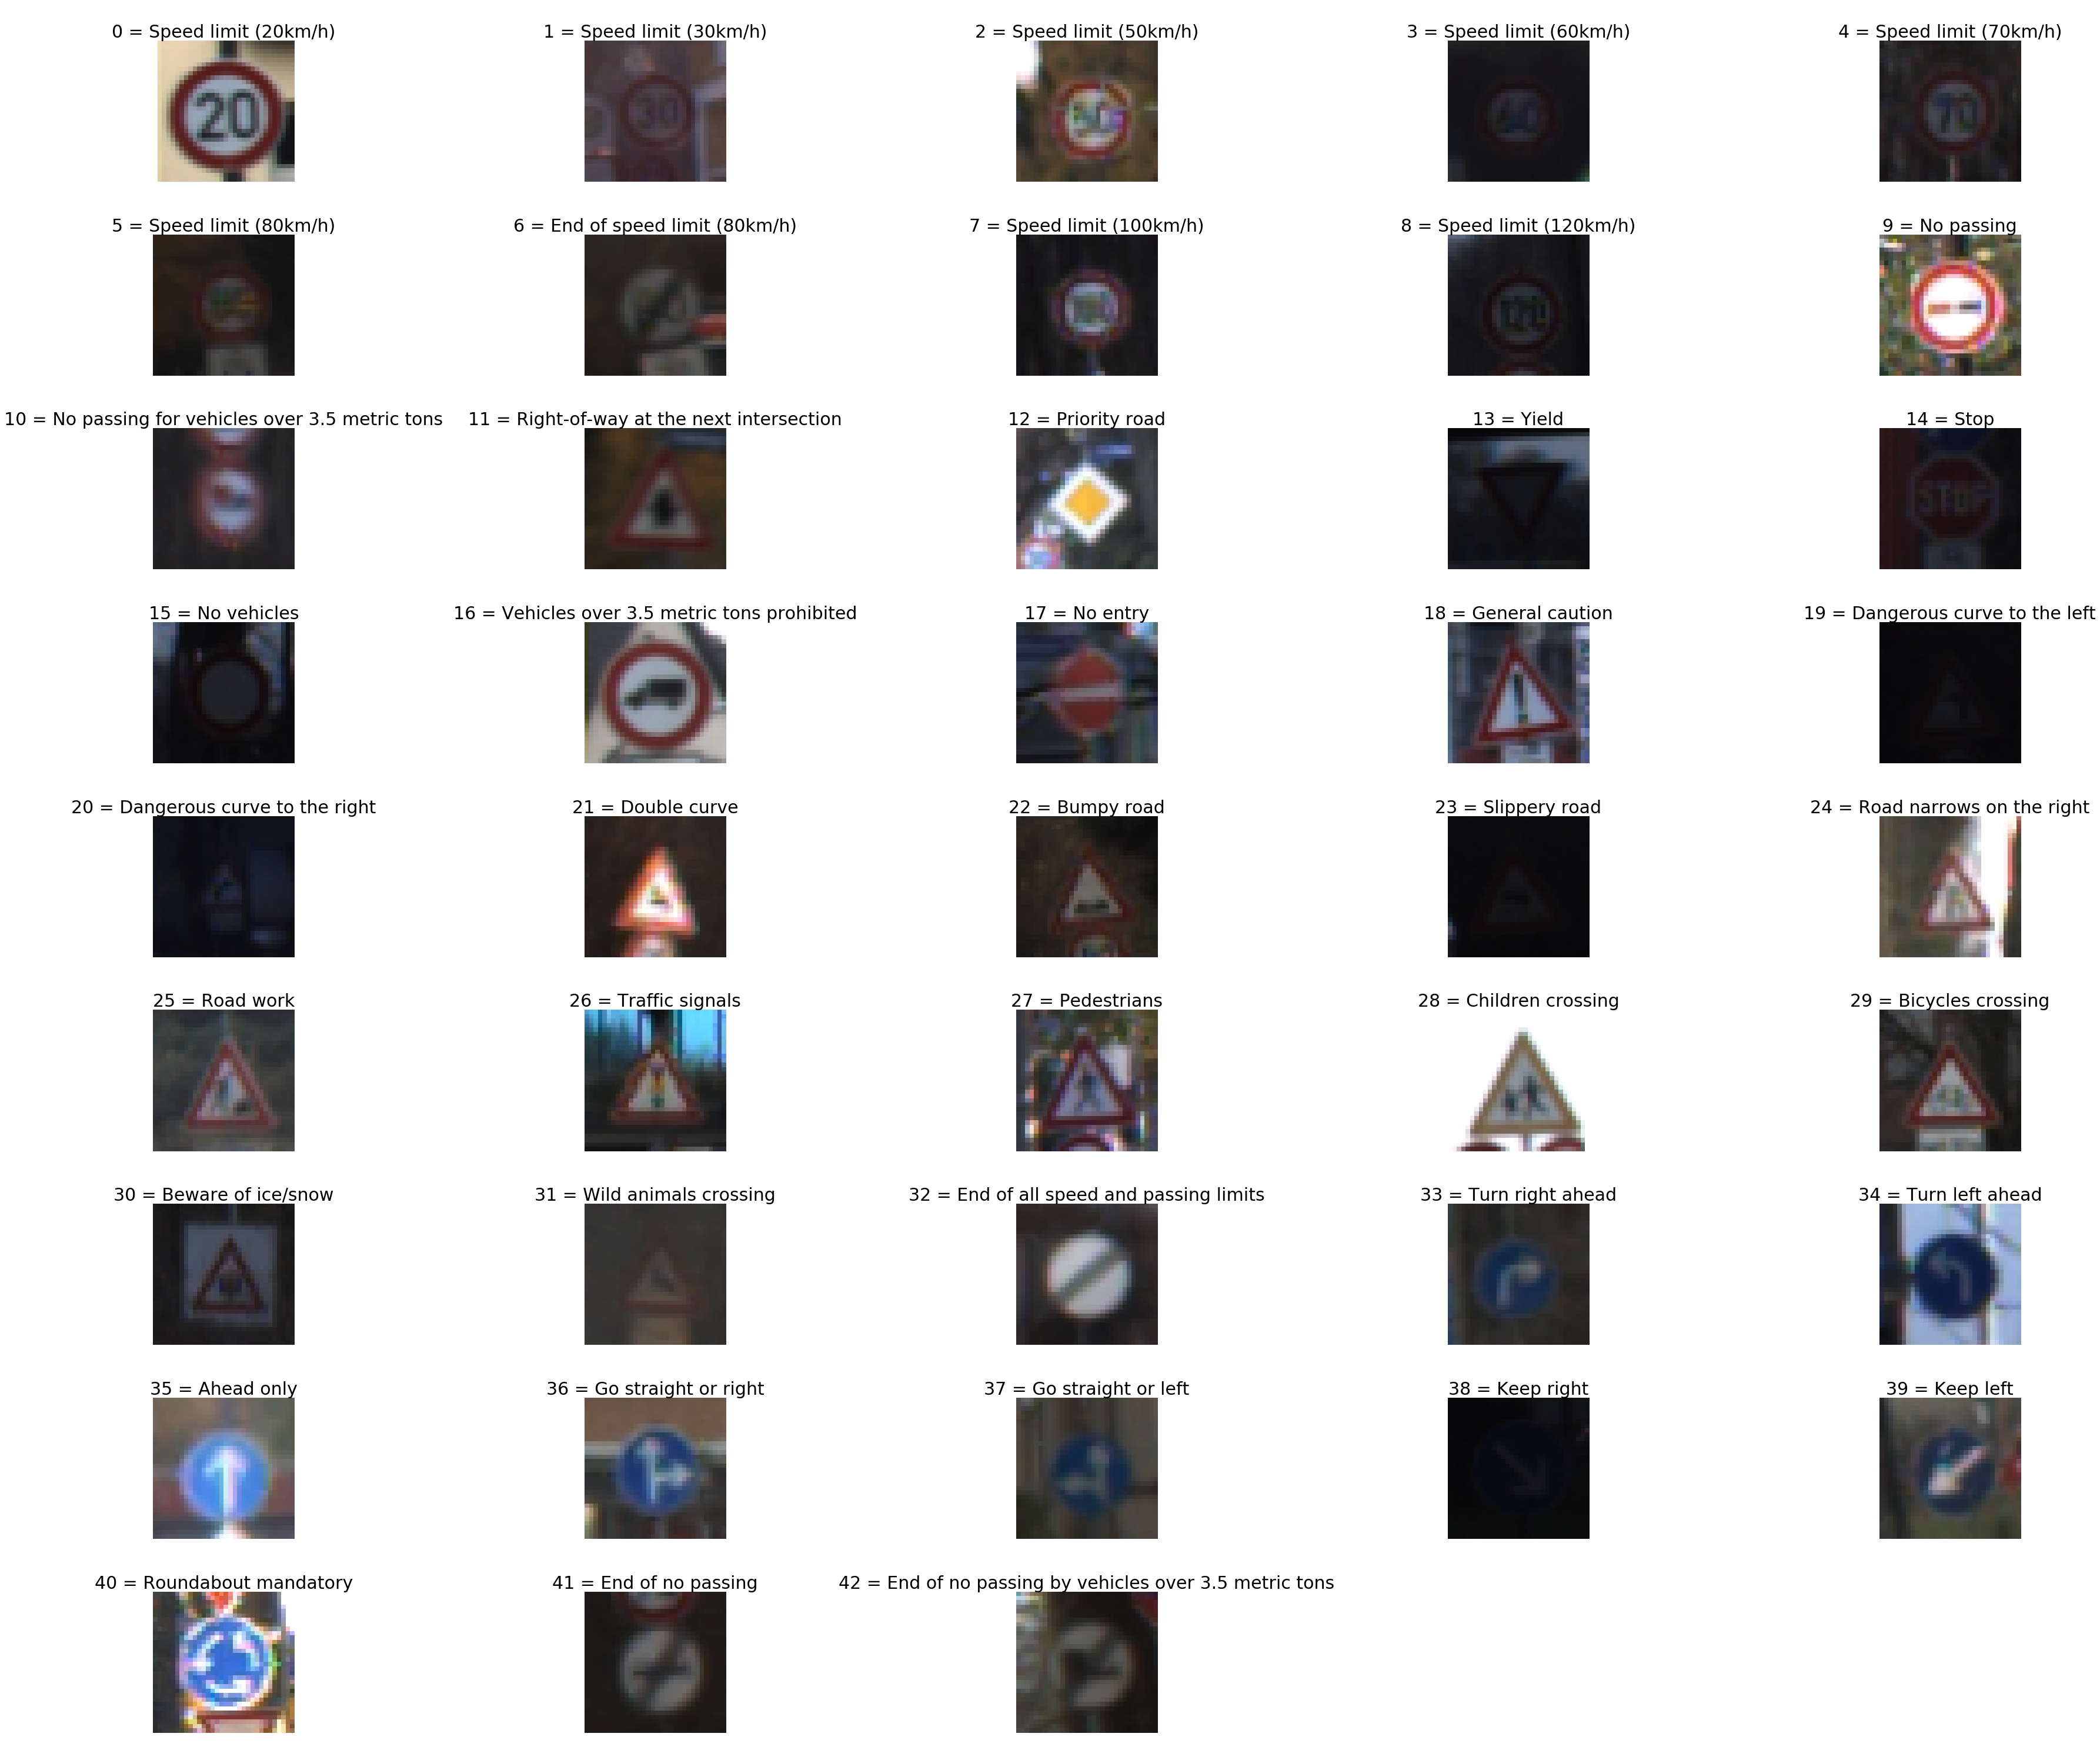


Preprocessing an example of each traffic sign class image...


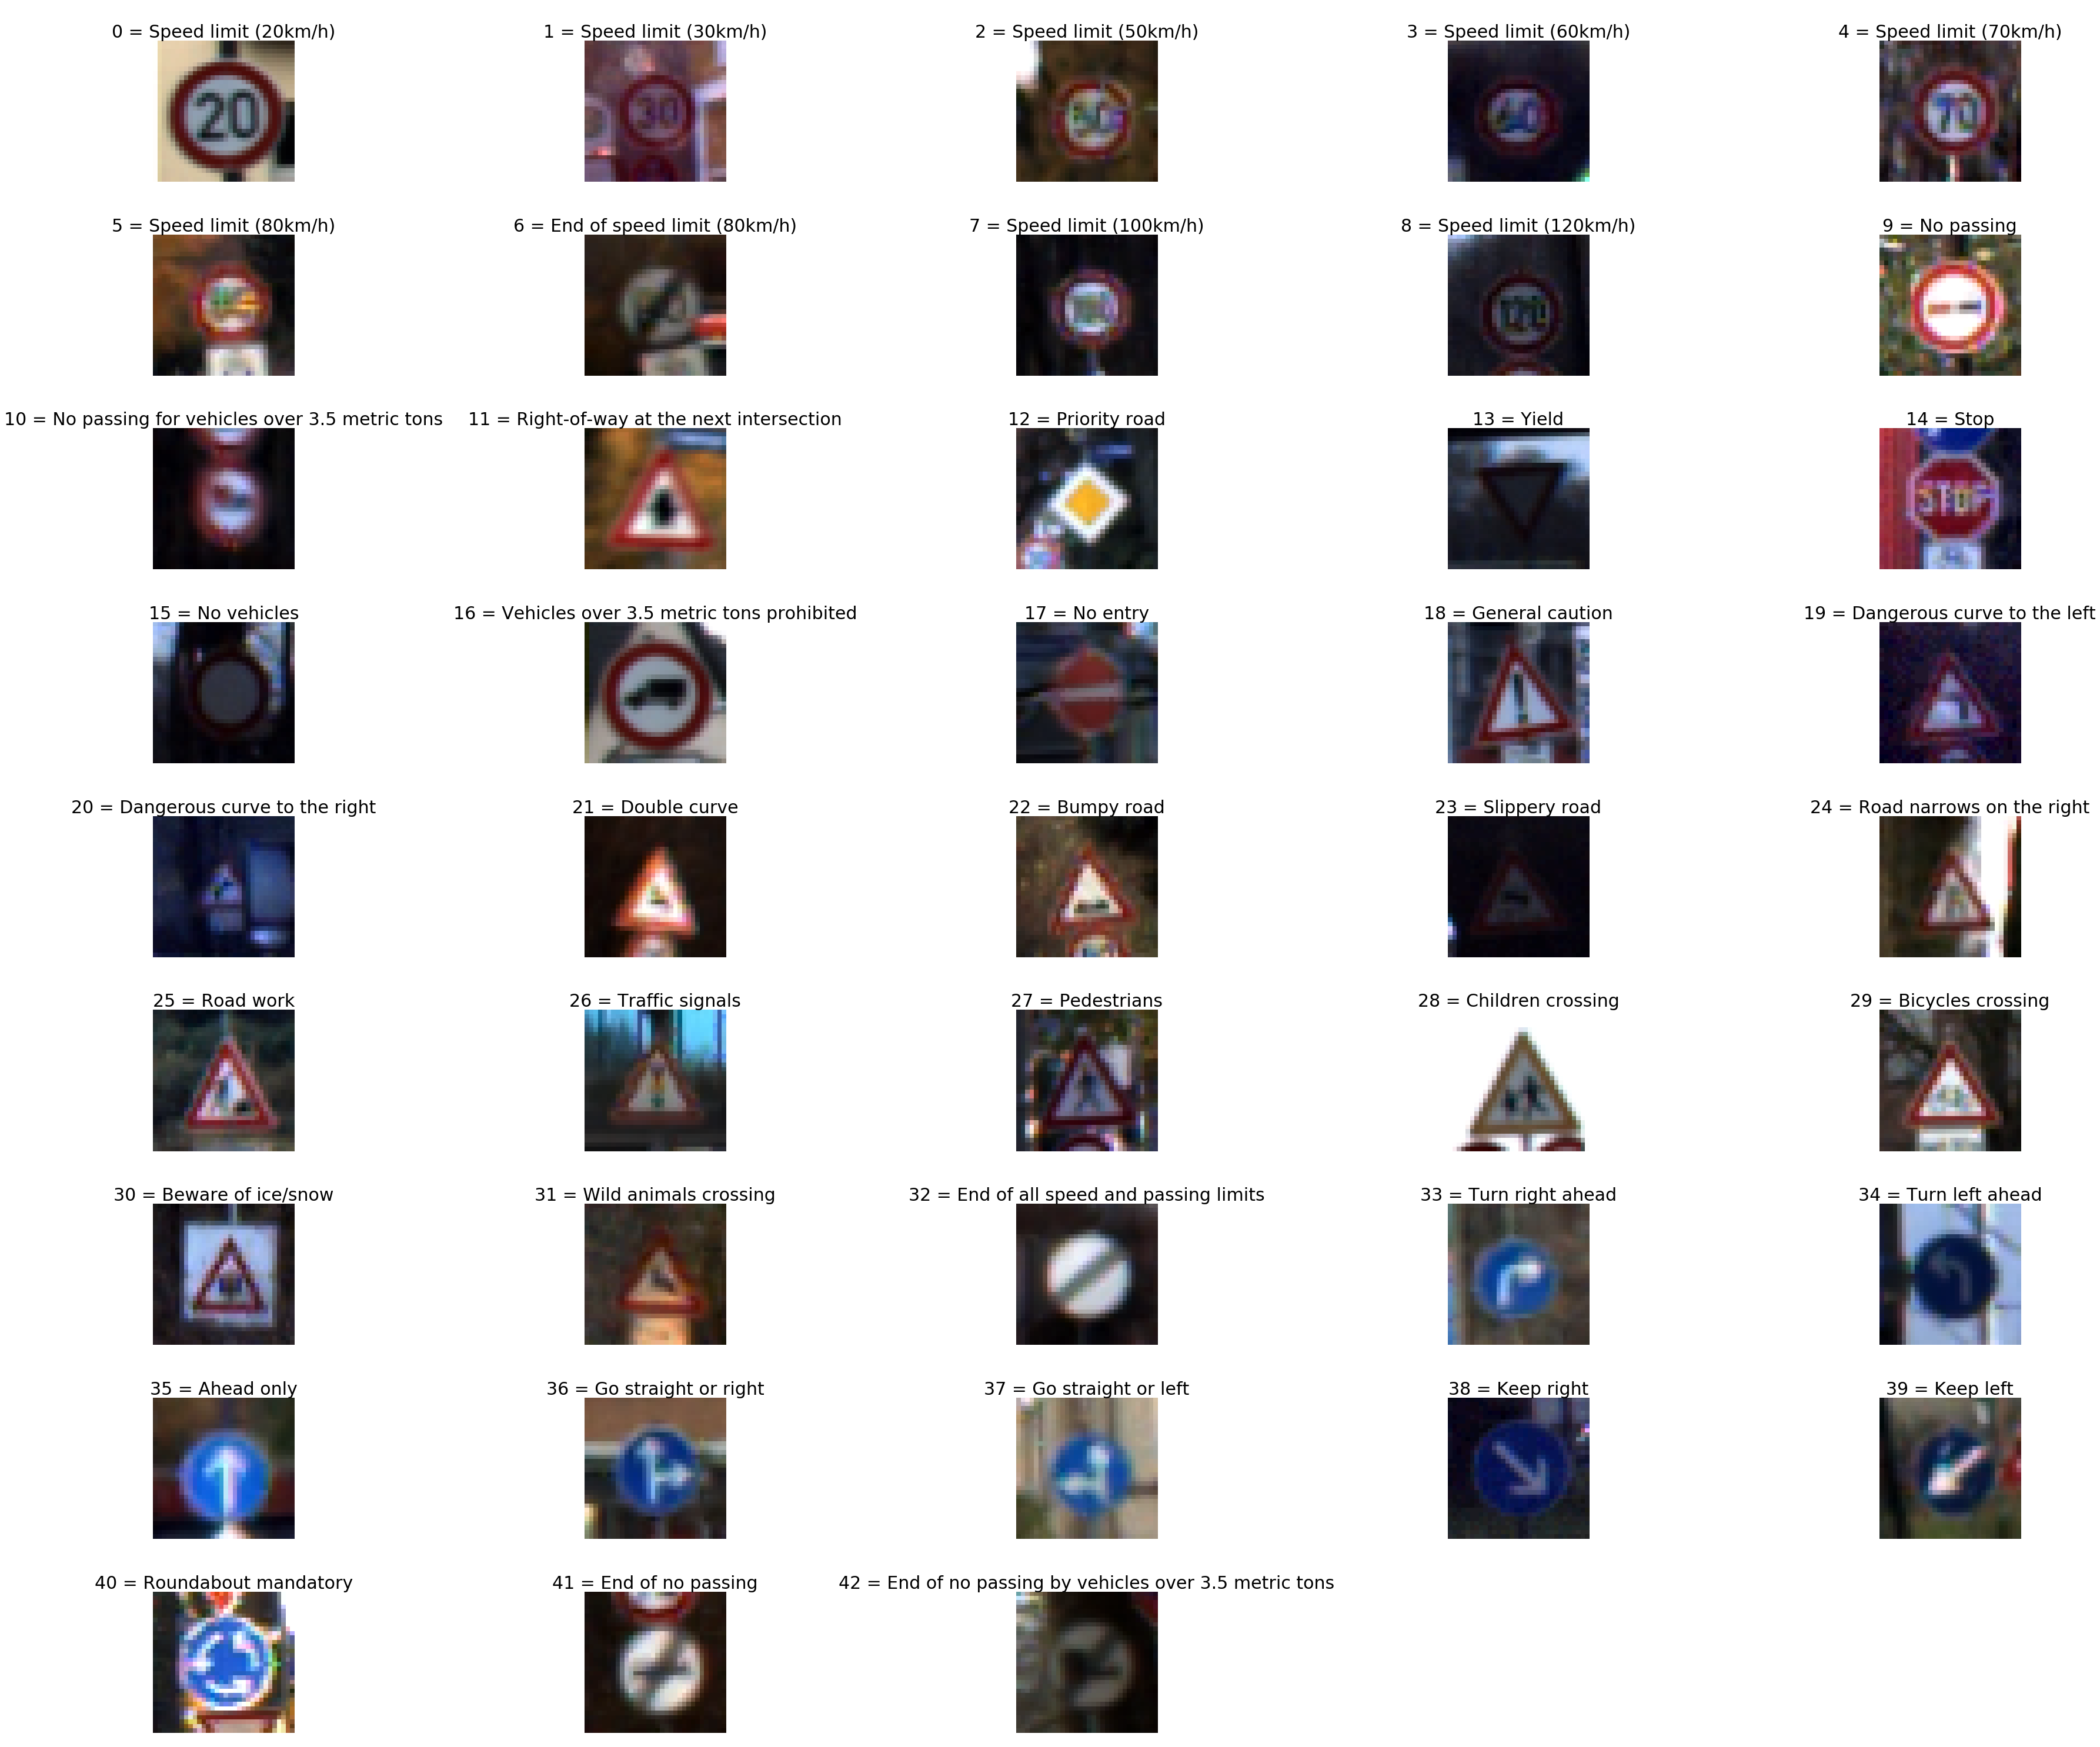

In [6]:
### Preprocess the data here. It is required to normalize the data. Other preprocessing steps could include 
### converting to grayscale, etc.

# Plot an example of each traffic sign class.
show_sign_examples(sign_examples, sign_names)

# Perform sample image preprocessing with the example of each traffic sign class.
preprocessed_sign_examples = np.array([preprocess(img) for img in sign_examples])
print("\nPreprocessing an example of each traffic sign class image...")
# Plot an preprocessed example of each traffic sign class.
show_sign_examples(preprocessed_sign_examples, sign_names, gray=True)

# Perform image preprocessing for all 3 datasets.
X_train = np.array([preprocess(img) for img in X_train])
X_valid = np.array([preprocess(img) for img in X_valid])
X_test = np.array([preprocess(img) for img in X_test])


### Model Architecture


![The LeNet Architecture (1990s)](https://ujwlkarn.files.wordpress.com/2016/08/screen-shot-2016-08-07-at-4-59-29-pm.png?w=748)
Figure 1: The LeNet architecture consists of two sets of convolutional, activation, and pooling layers, followed by a fully-connected layer, activation, another fully-connected, and finally a softmax classifier.
_________________________________________________________________
**1st Convolution** conv2d (Conv2D) input_shape=(32x32x3)<br/>
- Number of filters (depth) of the convolutional layer: 6 <br/>
- The height and width of the convolutional filters : 5x5 (feature map) <br/>
- without padding (VALID) : dropped out the border.<br/>
- ReLU activation function :  filter out all negative pixel values in the feature map and replaces by zero.
- Shape of a convolutional layer (width, height, depth): ( 28 , 28, 6 ) <br/>

**1st Pooling** max_pooling2d_1 (MaxPooling)<br/>
- The height and width of the convolutional filters : 2x2 window <br/>
- Reduced shape of a convolutional layer (width, height, depth): ( 14 , 14, 6 ) <br/>
_________________________________________________________________
**2nd Convolution** conv2d_2 (Conv2D) input_shape=(14 , 14, 6)<br/>
- Number of filters (depth) of the convolutional layer: 16 <br/>
- The height and width of the convolutional filters : 5x5 (feature map) <br/>
- without padding : dropped out the border.<br/>
- ReLU activation function :  filter out all negative pixel values in the feature map and replaces by zero.
- Shape of a convolutional layer (width, height, depth): ( 10 , 10, 16 ) <br/>

**2nd Pooling** max_pooling2d_2 (MaxPooling)<br/>
- The height and width of the convolutional filters : 2x2 window <br/>
- Reduced shape of a convolutional layer (width, height, depth): ( 5 , 5, 16 ) <br/>

_________________________________________________________________
**Flatten** flatten (Flatten) input_shape=(5 , 5, 16)<br/>
- Shape of a flatten layer (width, height, depth): ( 400 )<br/>

_________________________________________________________________
**1st Fully Connected** fc_layer_1 (FullyConnected) input_shape=( 400 )<br/>
- ReLU activation function :  filter out all negative pixel values in the feature map and replaces by zero.
- Dropout function :  individual nodes are either dropped out of the net with kept with probability dropout. 
- Shape of a fully connected layer (lenght): ( 120 ) <br/>

_________________________________________________________________
**2nd Fully Connected** fc_layer_2 (FullyConnected) input_shape=( 120 )<br/>
- ReLU activation function :  filter out all negative pixel values in the feature map and replaces by zero.
- Dropout function :  individual nodes are either dropped out of the net with kept with probability dropout. 
- Shape of a fully connected layer (lenght): ( 84 ) <br/>

_________________________________________________________________
**3rd Fully Connected** fc_layer_3 (FullyConnected) input_shape=( 84 )<br/>
- Softmax activation function :  computes softmax cross entropy between logits and labels (probability of each class).
- Shape of a fully connected layer (lenght): ( 43 ) <br/>

_________________________________________________________________

### Helper functions to support neural network model creating

The collection of helper functions to facilitate the creation of a neural network model. It has the main function of creating weights, biases, and the creation of layers of each type, such as a convolutional layer or fully connected layer.

- **new_weights**: function to create a weights of computational graph
- **new_biases**: function to create a biases of computational graph
- **maxpool2d**: function to create a max pooling layer
- **new_conv_layer**: function to create a convolutional layer
- **new_fc_layer**: function to create fully a connected layer
   

In [7]:
from tensorflow.contrib.layers import flatten
import tensorflow as tf

### Define your architecture here.
### Feel free to use as many code cells as needed.


def new_weights(shape, mean=0.0, stddev=0.05):
    """Helper function to create a weight of computational graph from the specific shape, mean, and standard deviation params.
    """
    return tf.Variable(tf.truncated_normal(shape, mean=mean, stddev=stddev))

def new_biases(length):
    """Helper function to create a biases of computational graph from the specific length param.
    """    
    return tf.Variable((tf.zeros(length)))

def maxpool2d(x, k=2):
    """Helper function to create a max pooling layer with size of the window for each dimension of the input tensor.
    """    
    return tf.nn.max_pool(x, ksize=[1, k, k, 1], strides=[1, k, k, 1], padding='SAME')


def new_conv_layer(x,
                   num_input_channels,
                   filter_size,
                   num_filters,
                   mean=0,
                   stddev=0.1,
                   dropout=1.0,
                   use_pooling=True):
    """Helper function to create a convolutional layer from params.
    
        new_conv_layer function uses x as input data or previous layer
        and create weights, biases then call tensorflow API to create a convolutional layer
        and follow by relu activation, dropout and finally max pooling layer.
        
        Args:
        x (array): input dataset.
        num_input_channels (int): number of input channels.
        filter_size (int): width and height of each filter.
        mean (float32): the mean of the truncated normal distribution for weights initial value.
        stddev (float32): the standard deviation of the normal distribution for weights initial value.
        dropout (float32): probability value to keep units in dropout layer.
        use_pooling (boolean): a flag to enable the creation of max pooling layer.
        
        Return convolutional layer.
    """    
    
    # Shape of the filter-weights for the convolution.
    shape = [filter_size, filter_size, num_input_channels, num_filters]

    # Create new weights.
    weights = new_weights(shape=shape, mean=mean, stddev=stddev)

    # Create new biases.
    biases = new_biases(length=num_filters)

    # Create convolutional layer with 1x1 stride of the sliding window for each dimension with VALID padding algorithm.
    layer = tf.nn.conv2d(input=x,
                         filter=weights,
                         strides=[1, 1, 1, 1],
                         padding='VALID') + biases


    print("conv2d shape", layer)
    
    # Create relu activation layer.
    layer = tf.nn.relu(layer)
    # Create dropout layer.
    layer = tf.nn.dropout(layer, dropout)

    # If use pooling is True then enable a max pooling layer.
    if use_pooling:
        # Create max pooling layer follow by dropout layer
        layer = maxpool2d(layer)
        print("maxpool2d shape", layer)
        layer = tf.nn.dropout(layer, dropout)
        print("dropout shape", layer)   
    return layer, weights


def new_fc_layer(x,
                 num_inputs,
                 num_outputs,
                 dropout,
                 use_relu=True):
    """Helper function to create a fully connected layer from params.
    
        new_fc_layer function uses x as input data or previous layer
        and multiply with weights then add biases and perform rulu activation finally dropout function.
        
        Args:
        x (array): input dataset.
        num_input_channels (int): number of input channels.
        num_outputs (int): number of outputs.
        dropout (float32): probability value to keep units in dropout layer.
        use_relu (boolean): a flag to enable a relu activation function.
        
        Return fully connected layer.
    """    
    
    # Create new weights and biases.
    weights = new_weights(shape=[num_inputs, num_outputs])
    biases = new_biases(length=num_outputs)

    # Calculate the layer as the matrix multiplication of
    # the input and weights, and then add the bias-values.
    layer = tf.add(tf.matmul(x, weights), biases)
    print("new_fc_layer shape", layer)
    
    # If use use_relu is True then enable a relu layer.
    if use_relu:
        layer = tf.nn.relu(layer)
    
    # Create dropout layer.
    layer = tf.nn.dropout(layer, dropout)
    print("dropout shape", layer) 
    return layer


C:\Users\pongrut\Anaconda3\envs\carnd-term1\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [8]:

def LeNet(x):    
    """Helper function to create a LeNet model.
    """   
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
  
    
    # Layer 1: Create convolutional layer. Input = 32x32x3, Output = 28x28x6.
    # Relu Activation.   
    # Pooling. Input = 28x28x6. Output = 14x14x6.
    layer_conv1, weights_conv1 = \
        new_conv_layer(x=x,
                   num_input_channels=3,
                   filter_size=5,
                   num_filters=6,
                   mean=mu,
                   stddev=sigma,
                   dropout=1.0,
                   use_pooling=True)

    # Layer 2: Create convolutional layer. Input =14x14x6, Output = 10x10x16.
    # Relu Activation.    
    # Pooling. Input = 10x10x16. Output = 5x5x16.

    layer_conv2, weights_conv2 = \
        new_conv_layer(x=layer_conv1,
                   num_input_channels=6,
                   filter_size=5,
                   num_filters=16,
                   mean=mu,
                   stddev=sigma,
                   dropout=1.0,
                   use_pooling=True)
    # Flatten. Input = 5x5x16. Output = 400.
    layer_flat = tf.contrib.layers.flatten(layer_conv2)
    print("flatten_layer shape", layer_flat)   
    # Layer 3: Create fully connected layer. Input = 400. Output = 120.
    #  Activation.
    layer_fc1 = new_fc_layer(x=layer_flat,
                         num_inputs=400,
                         num_outputs=120,
                         dropout=keep_prob,
                         use_relu=True)

    # Layer 4: Create fully connected layer. Input = 120. Output = 84.
    # Relu Activation.
    layer_fc2 = new_fc_layer(x=layer_fc1,
                         num_inputs=120,
                         num_outputs=84,
                         dropout=keep_prob,
                         use_relu=True)
    # Layer 5: Create fully connected layer. Input = 84. Output = 43.
    logits = new_fc_layer(x=layer_fc2,
                         num_inputs=84,
                         num_outputs=n_classes,
                         dropout=1.0,
                         use_relu=False)  
    return logits

In [9]:
# Create place holders for x, y, one_hot, and keep_prob variables.
x = tf.placeholder(tf.float32, (None, 32, 32, 3))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, n_classes)
keep_prob = tf.placeholder(tf.float32)

In [10]:
# Pipeline to create LeNet model
# learning rate parameter
rate = 0.001
# Create LeNet model.
logits = LeNet(x)
# Add softmax at the end of the network.
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
# Perform loss calculation.
loss_operation = tf.reduce_mean(cross_entropy)
# Compute gradients and minimize loss.
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)


conv2d shape Tensor("add:0", shape=(?, 28, 28, 6), dtype=float32)
maxpool2d shape Tensor("MaxPool:0", shape=(?, 14, 14, 6), dtype=float32)
dropout shape Tensor("MaxPool:0", shape=(?, 14, 14, 6), dtype=float32)
conv2d shape Tensor("add_1:0", shape=(?, 10, 10, 16), dtype=float32)
maxpool2d shape Tensor("MaxPool_1:0", shape=(?, 5, 5, 16), dtype=float32)
dropout shape Tensor("MaxPool_1:0", shape=(?, 5, 5, 16), dtype=float32)
flatten_layer shape Tensor("Flatten/flatten/Reshape:0", shape=(?, 400), dtype=float32)
new_fc_layer shape Tensor("Add:0", shape=(?, 120), dtype=float32)
dropout shape Tensor("dropout_4/mul:0", shape=(?, 120), dtype=float32)
new_fc_layer shape Tensor("Add_1:0", shape=(?, 84), dtype=float32)
dropout shape Tensor("dropout_5/mul:0", shape=(?, 84), dtype=float32)
new_fc_layer shape Tensor("Add_2:0", shape=(?, 43), dtype=float32)
dropout shape Tensor("Add_2:0", shape=(?, 43), dtype=float32)
Instructions for updating:

Future major versions of TensorFlow will allow gradients 

In [11]:
# Find the sorted classification probability.
prediction = tf.argmax(logits, 1)
# Compare predicted classes with true classes.
correct_prediction = tf.equal(prediction, tf.argmax(one_hot_y, 1))
# Calcuate accuracy of prediction results.
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    """Function to calculate total accuracy of the model.
    """   
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    # Calculate accuracy of the model in batch processing.
    for offset in range(0, num_examples, BATCH_SIZE):
        # Slide dataset set in BATCH_SIZE size.
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        # Perform accuracy calculation.
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 1.0})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [12]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.
from sklearn.utils import shuffle
from time import time
EPOCHS = 100
BATCH_SIZE = 128*4
max_validation_accuracy = 0.0
model_path = "./saved_model"

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    print("Training...")
    print()
    
    # Run training equal EPOCHS loops.
    for i in range(EPOCHS):
        # Get start time
        start = time() 
        # Shuffle X_train, y_train datasets.
        X_train, y_train = shuffle(X_train, y_train)
        
        # Perform training in batch processing.
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            # Slide dataset set in BATCH_SIZE size.
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            # Enable all 5 augmentation functions.
            rand_rotation, rand_shear, rand_shift, rand_zoom, rand_noise = (1,1,1,1,1)
            # Perform image augmentations and each output batch size is BATCH_SIZE*5+1.
            batch_x_aug, batch_y_aug = augment_data(batch_x, batch_y,\
                                             use_random_rotation=rand_rotation, use_random_shear=rand_shear,\
                                             use_random_shift=rand_shift, use_random_zoom=rand_zoom, use_random_noise=rand_noise)
            # Training.
            sess.run(training_operation, feed_dict={x: batch_x_aug, y: batch_y_aug, keep_prob: 0.50})
        # Perform accuracy calculation.
        validation_accuracy = evaluate(X_valid, y_valid)
        print("EPOCH [{}/{}] validation accuracy = {:.3f}, training_time: {:.4f} secs.".\
              format(i+1,EPOCHS, validation_accuracy, time()-start))
        # If current accuracy higher than max_validation_accuracy then save the current model.
        if validation_accuracy > max_validation_accuracy:
            saver.save(sess, model_path+"/lenet_traffic_sign_classifier")
            # save current accuracy value to max accuracy.
            max_validation_accuracy = validation_accuracy
            print("EPOCH {}: validation accuracy improved to {:.3f}, saving model to {}".\
                  format(i+1, validation_accuracy,model_path))



Training...

EPOCH [1/100] validation accuracy = 0.263, training_time: 47.3293 secs.
EPOCH 1: validation accuracy improved to 0.263, saving model to ./saved_model
EPOCH [2/100] validation accuracy = 0.446, training_time: 46.4615 secs.
EPOCH 2: validation accuracy improved to 0.446, saving model to ./saved_model
EPOCH [3/100] validation accuracy = 0.570, training_time: 45.9800 secs.
EPOCH 3: validation accuracy improved to 0.570, saving model to ./saved_model
EPOCH [4/100] validation accuracy = 0.655, training_time: 46.0146 secs.
EPOCH 4: validation accuracy improved to 0.655, saving model to ./saved_model
EPOCH [5/100] validation accuracy = 0.742, training_time: 46.9682 secs.
EPOCH 5: validation accuracy improved to 0.742, saving model to ./saved_model
EPOCH [6/100] validation accuracy = 0.785, training_time: 45.9959 secs.
EPOCH 6: validation accuracy improved to 0.785, saving model to ./saved_model
EPOCH [7/100] validation accuracy = 0.817, training_time: 47.2040 secs.
EPOCH 7: valida

EPOCH [76/100] validation accuracy = 0.947, training_time: 44.2489 secs.
EPOCH [77/100] validation accuracy = 0.946, training_time: 44.9795 secs.
EPOCH [78/100] validation accuracy = 0.946, training_time: 44.6573 secs.
EPOCH [79/100] validation accuracy = 0.944, training_time: 44.2774 secs.
EPOCH [80/100] validation accuracy = 0.948, training_time: 45.4299 secs.
EPOCH 80: validation accuracy improved to 0.948, saving model to ./saved_model
EPOCH [81/100] validation accuracy = 0.950, training_time: 45.4887 secs.
EPOCH 81: validation accuracy improved to 0.950, saving model to ./saved_model
EPOCH [82/100] validation accuracy = 0.948, training_time: 45.5505 secs.
EPOCH [83/100] validation accuracy = 0.952, training_time: 45.2267 secs.
EPOCH 83: validation accuracy improved to 0.952, saving model to ./saved_model
EPOCH [84/100] validation accuracy = 0.952, training_time: 45.2998 secs.
EPOCH 84: validation accuracy improved to 0.952, saving model to ./saved_model
EPOCH [85/100] validation a

In [13]:
# Test to restore the saved model.
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint(model_path))
    
    print("\n  Training set accuracy = {:.3f}".format(evaluate(X_train, y_train)))
    print("Validation set accuracy = {:.3f}".format(evaluate(X_valid, y_valid)))
    print("      Test set accuracy = {:.3f}".format(evaluate(X_test, y_test)))

INFO:tensorflow:Restoring parameters from ./saved_model\lenet_traffic_sign_classifier

  Training set accuracy = 0.998
Validation set accuracy = 0.953
      Test set accuracy = 0.944


---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

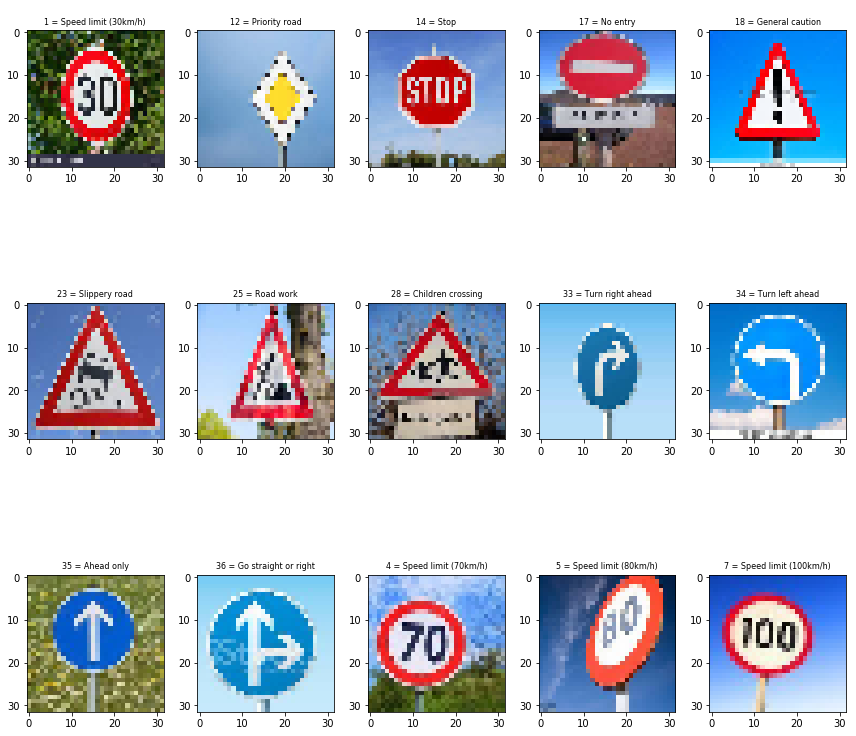

In [14]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.

import matplotlib.gridspec as gridspec
from glob import glob
import matplotlib.image as mpimg
import ntpath

def path_leaf(path):
    """Helper function to extract filename from path input.
    """
    head, tail = ntpath.split(path)
    return tail


def path_root(path):
    """Helper function to extract pathname from path input.
    """
    head, tail = ntpath.split(path)
    return ntpath.basename(head)

# Load 15 new sign image filenames.
image_paths = sorted(glob("new_images/*.jpg"))
# Preprocess all 15 sign images.
X_test_new = np.array([preprocess(mpimg.imread(image_path)) for image_path in image_paths])
# Define true classes and store into y_test_new.
y_test_new = np.array([int(path_leaf(image_path.replace(".jpg",""))) for image_path in image_paths])

# Load sing type names into text.
text = [str(i)+" = "+sign_names.loc[i][0] for i in y_test_new ]

# Display all 15 new sign images with labels.
rows = 3
cols = 5
IMAGE_SIZE = (12,12)
HORIZONTAL=1
              
gs1 = gridspec.GridSpec(rows, cols)
gs1.update(wspace=0.01, hspace=0.02) # set the spacing between axes. 
plt.figure(figsize=IMAGE_SIZE)
for i, image in enumerate(X_test_new):
    ax1 = plt.subplot(gs1[i])
    plt.subplot(rows, cols, i+1)
    plt.imshow(image, cmap="gray")
    plt.title("\n{}".format(text[i]), fontsize=int(IMAGE_SIZE[0]*.7))
plt.tight_layout()
plt.show()


### Predict the Sign Type for Each Image

In [15]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.

with tf.Session() as sess:
    # Load the saved model.
    saver.restore(sess, tf.train.latest_checkpoint(model_path))
    # Run predition for new 15 sign images.
    predictions = sess.run(prediction, feed_dict={x: X_test_new, keep_prob: 1.0})

# Print predictions and compare with true labels.
print()
print('{:^2}{:^30}{:^2}{:^30}'.format("ID", "Image", "ID", "Prediction"))
print('{:^2}{:^30}{:^2}{:^30}'.format("__", "____________________________", "__", "____________________________"))
for y_i, p_i in zip(y_test_new, predictions):
    print('{:>2} {:<30}{:>2} {:<30}'.format(y_i, sign_names.loc[y_i][0],p_i, sign_names.loc[p_i][0]))


INFO:tensorflow:Restoring parameters from ./saved_model\lenet_traffic_sign_classifier

ID            Image             ID          Prediction          
__ ____________________________ __ ____________________________ 
 1 Speed limit (30km/h)           1 Speed limit (30km/h)          
12 Priority road                 12 Priority road                 
14 Stop                          14 Stop                          
17 No entry                      17 No entry                      
18 General caution               18 General caution               
23 Slippery road                 23 Slippery road                 
25 Road work                     25 Road work                     
28 Children crossing             31 Wild animals crossing         
33 Turn right ahead              33 Turn right ahead              
34 Turn left ahead               34 Turn left ahead               
35 Ahead only                    35 Ahead only                    
36 Go straight or right          36 Go straigh

### Analyze Performance

In [16]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.
with tf.Session() as sess:
    # Load the saved model.
    saver.restore(sess, tf.train.latest_checkpoint(model_path))
    # Perform accuracy calculation.
    test_accuracy = evaluate(X_test_new, y_test_new)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

INFO:tensorflow:Restoring parameters from ./saved_model\lenet_traffic_sign_classifier
Test Accuracy = 0.800


### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tf.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [17]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.
with tf.Session() as sess:
    # Load the saved model.
    saver.restore(sess, tf.train.latest_checkpoint(model_path))
    # Run soft max to get prediction probability values.
    softmaxes = sess.run(tf.nn.softmax(logits), feed_dict={x: X_test_new, keep_prob: 1.0})
    # Finds values and indices of the 5 largest entries for the last dimension.
    values, indices = sess.run(tf.nn.top_k(softmaxes, k=5))
    
# Print out the values & indicies with 5 digits precision.
np.set_printoptions(precision=5)
print('\n' + str(values))
print('\n' + str(indices))

INFO:tensorflow:Restoring parameters from ./saved_model\lenet_traffic_sign_classifier

[[9.98707e-01 1.25676e-03 3.60534e-05 1.23724e-07 4.90852e-08]
 [9.99691e-01 2.97528e-04 6.54239e-06 2.22540e-06 1.92234e-06]
 [1.00000e+00 8.08460e-09 2.54433e-10 2.59729e-13 2.09314e-17]
 [6.54568e-01 3.41686e-01 2.29165e-03 1.36924e-03 5.70693e-05]
 [9.99999e-01 5.40391e-07 2.02973e-10 9.56632e-11 4.10311e-19]
 [7.10787e-01 2.74197e-01 1.40048e-02 5.11075e-04 3.51491e-04]
 [9.98253e-01 1.69961e-03 3.06424e-05 1.21773e-05 2.69924e-06]
 [1.95994e-01 1.90272e-01 1.65288e-01 1.10753e-01 8.39993e-02]
 [9.74949e-01 1.40539e-02 5.34295e-03 3.60443e-03 1.18154e-03]
 [9.97992e-01 2.00567e-03 1.38218e-06 7.58078e-07 1.20184e-10]
 [8.76191e-01 5.22151e-02 4.52461e-02 2.28113e-02 3.32698e-03]
 [9.90904e-01 7.31198e-03 1.64566e-03 1.37798e-04 5.84174e-07]
 [7.28366e-01 1.54069e-01 1.15021e-01 1.86739e-03 4.91585e-04]
 [9.96349e-01 3.02195e-03 5.90754e-04 1.54284e-05 9.46579e-06]
 [3.81228e-01 3.79783e-01 1.190

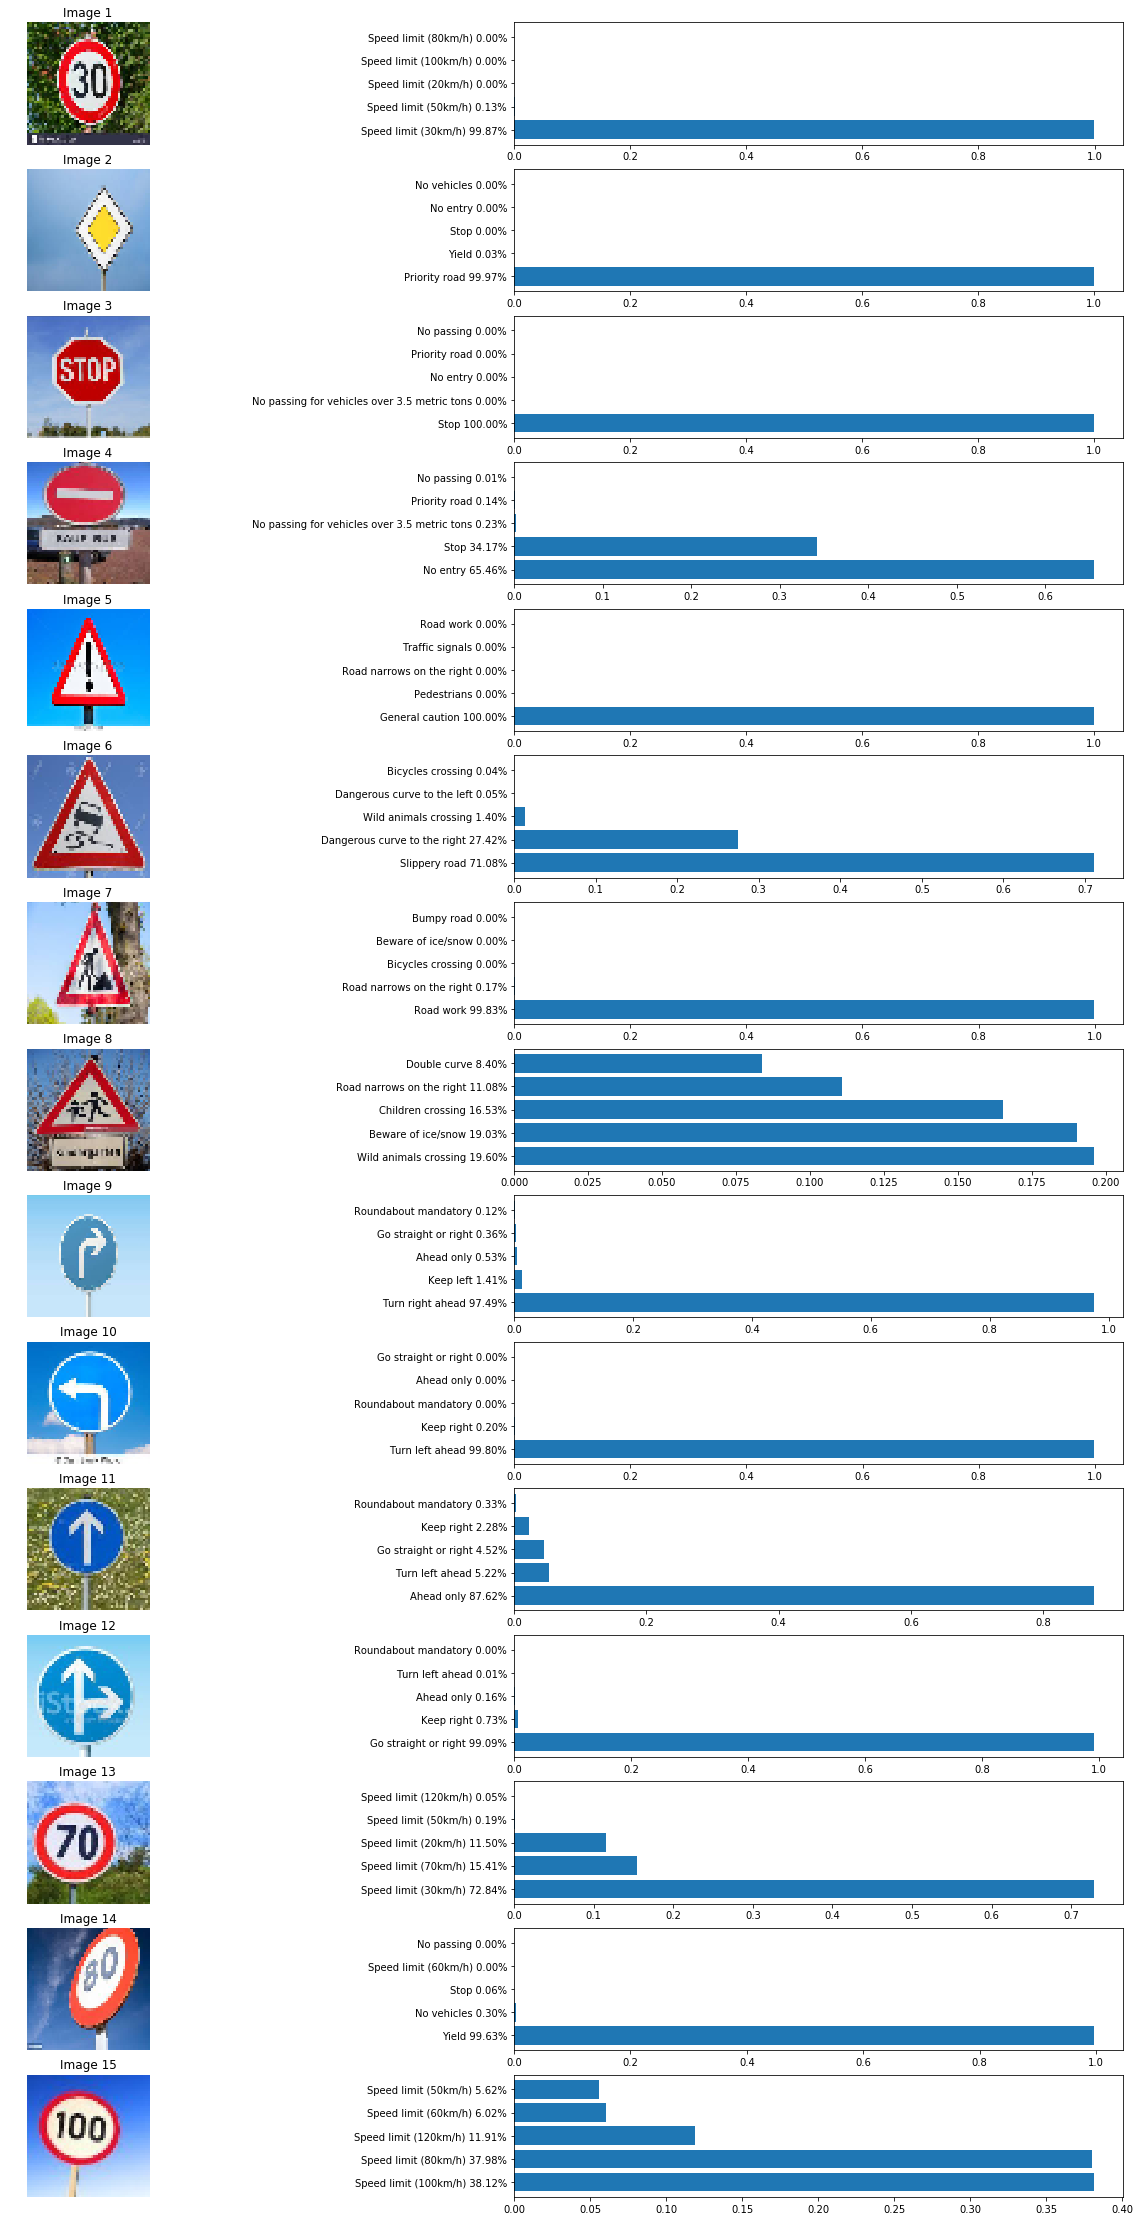

In [18]:
# Display all 15 new sign image & its predicted label with top 5 probability labels.
image_num = len(image_paths)
plt.figure(figsize=(24, 40))
for i, image_path in enumerate(image_paths):
    plt.subplot(image_num, 2, 2*i+1)
    img = mpimg.imread(image_path)
    img = image_resize(img, image_size= (50,50))
    plt.imshow(img)
    plt.title("Image {:.0f}".format(i+1))
    plt.axis('off')
    plt.subplot(image_num, 2, 2*i+2)
    plt.barh(np.arange(1, 6, 1), values[i, :])
    labs=[sign_names.loc[class_id][0]+" {:.2%}".format(prob) for prob, class_id in zip(values[i], indices[i])]
    plt.yticks(np.arange(1, 6, 1), labs)
plt.show()   

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [ ]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")
            
